# Explainable AI for modeling liquefaction

> Krishna Kumar, UT Austin

In [ ]:
!pip install xgboost shap -q

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import xgboost
import shap

In [ ]:
# Parameterized cell
fname = 'https://raw.githubusercontent.com/NHERI-SimCenter/SimCenter_DesignSafe_ML_2022/main/notebooks/day2/RF_YN_Model3.csv'

In [ ]:
df = pd.read_csv(fname)

In [ ]:
df.head()

,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
0,182,0.370809,0.909116,0.319117,5.465739,0.546270,0
1,15635,1.300896,1.123009,0.211770,0.905948,0.532398,0
2,8292,1.300896,0.847858,0.195947,0.849104,0.532398,0
3,15629,1.788212,2.044325,0.115795,0.451034,0.542307,0
4,183,1.637517,2.003797,0.137265,0.941866,0.545784,1


In [ ]:
df = df.drop(['Test ID', 'Elevation'], axis=1)
df.head()

,GWD (m),L (km),Slope (%),PGA (g),Target
0,0.370809,0.319117,5.465739,0.546270,0
1,1.300896,0.211770,0.905948,0.532398,0
2,1.300896,0.195947,0.849104,0.532398,0
3,1.788212,0.115795,0.451034,0.542307,0
4,1.637517,0.137265,0.941866,0.545784,1


In [ ]:
X = df.copy(deep=True)
y = df['Target']

In [ ]:
X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2)
X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.25)

In [ ]:
X_train_target.head()

,GWD (m),L (km),Slope (%),PGA (g),Target
1581,2.990827,1.608634,0.777611,0.372697,0
6977,0.897368,0.038210,0.993012,0.457127,1
4612,2.133394,2.367794,0.781177,0.357298,0
5833,1.971234,0.354141,0.473103,0.440029,0
2381,2.443757,0.498692,0.237343,0.445693,0


In [ ]:
X_train = X_train_target.drop(['Target'], axis=1)
X_test = X_test_target.drop(['Target'], axis=1)
X_val = X_val_target.drop(['Target'], axis=1)

# Decision Tree Classifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(X_val, y_val)

0.7945205479452054

In [ ]:
clf.predict(X_test)[2]

1

In [ ]:
X_test.head()

,GWD (m),L (km),Slope (%),PGA (g)
1834,2.560707,0.706629,0.530763,0.411417
4113,1.072310,0.042824,0.669329,0.507409
3893,1.947701,1.213217,1.241933,0.473301
4958,1.929294,0.980089,0.420302,0.418122
1819,2.577826,0.624266,1.254754,0.414687


# XGB classifier

In [ ]:
xgb = xgboost.XGBClassifier(max_depth=9)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgb.score(X_val, y_val)

0.8164383561643835

In [ ]:
xgb.score(X_train, y_train)

0.9969135802469136

In [ ]:
xgb.score(X_test, y_test)

0.8308957952468007

In [ ]:
clf.score(X_test, y_test)

0.8089579524680073

# XAI explanations

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


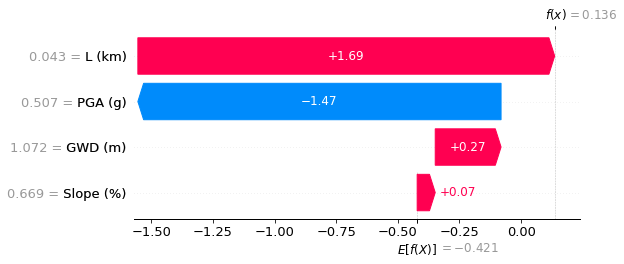

In [ ]:
shap.plots.waterfall(shap_values[1])

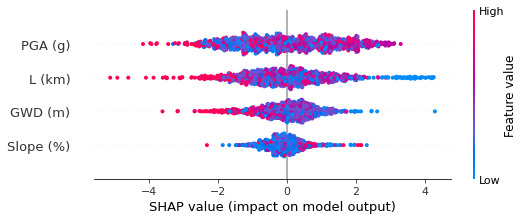

In [ ]:
shap.plots.beeswarm(shap_values)